In [201]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import mean_absolute_error

## 1. import data

In [202]:
train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('used_car_testB_20200421.csv', sep=' ')
test['price'] = -999

## 2. EDA

In [203]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [204]:
test.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,2581.080680,0.0,0.0,2.016033e+07,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209,-999.0
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,1889.248559,0.0,0.0,1.113395e+02,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718,0.0
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.014031e+07,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192,-999.0
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1006.000000,0.0,0.0,2.016031e+07,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706,-999.0
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2204.500000,0.0,0.0,2.016032e+07,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849,-999.0
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3842.000000,0.0,0.0,2.016033e+07,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555,-999.0
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,8120.000000,0.0,0.0,2.016041e+07,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768,-999.0


### 2.1 Check missing values

In [205]:
missing_train = pd.DataFrame(train.isnull().sum() / len(train)).reset_index()\
                           .rename(columns={'index': 'name', 0: 'pct'}).sort_values('pct', ascending=False)
missing_train[missing_train['pct']>0]

,name,pct
6,fuelType,0.057867
7,gearbox,0.039873
5,bodyType,0.030040
3,model,0.000007


In [206]:
missing_test = pd.DataFrame(test.isnull().sum() / len(train)).reset_index()\
                           .rename(columns={'index': 'name', 0: 'pct'}).sort_values('pct', ascending=False)
missing_test[missing_test['pct']>0]

,name,pct
6,fuelType,0.019493
7,gearbox,0.013120
5,bodyType,0.010027


### 2.2 price by brand, model, bodyType, fuelType, gearbox

Text(0.5, 1.0, 'Avarage prices by brand')

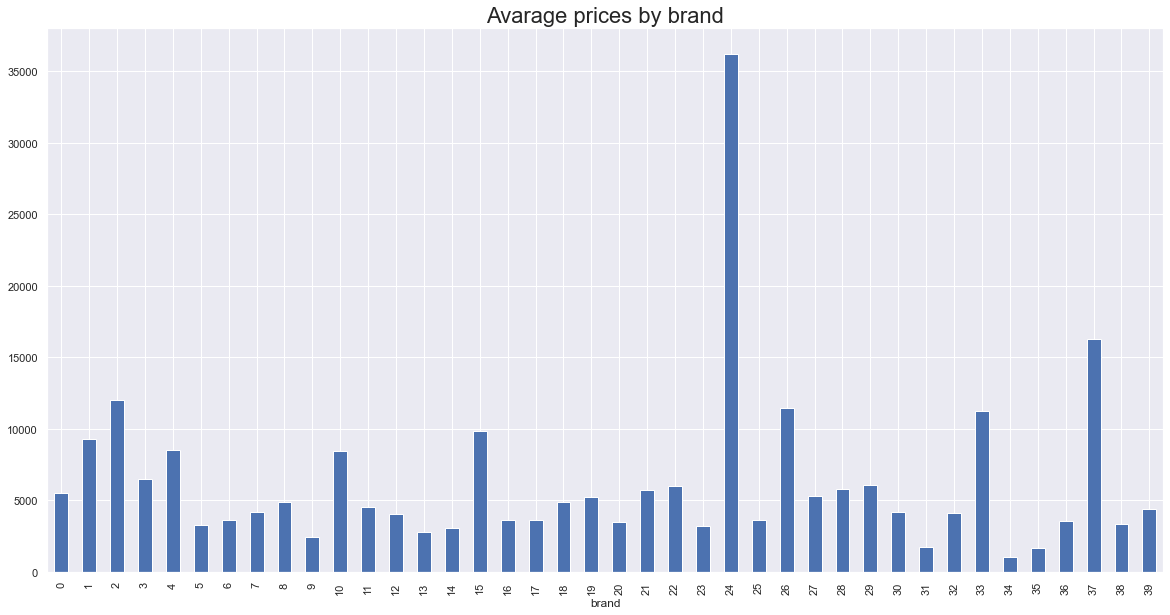

In [207]:
plt.figure(figsize=(20, 10))
train.groupby(['brand'])['price'].mean().plot(kind='bar')
plt.title('Avarage prices by brand', fontsize=22)

Text(0.5, 1.0, 'Avarage prices by model')

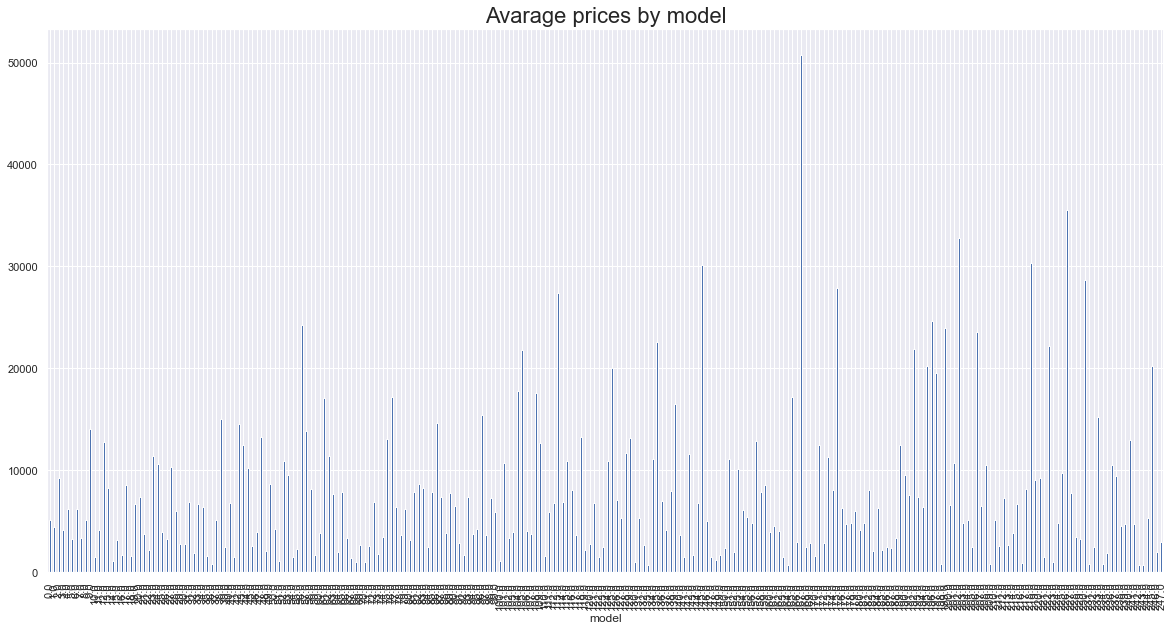

In [208]:
plt.figure(figsize=(20, 10))
train.groupby(['model'])['price'].mean().plot(kind='bar')
plt.title('Avarage prices by model', fontsize=22)

Text(0.5, 1.0, 'Avarage prices by bodyType')

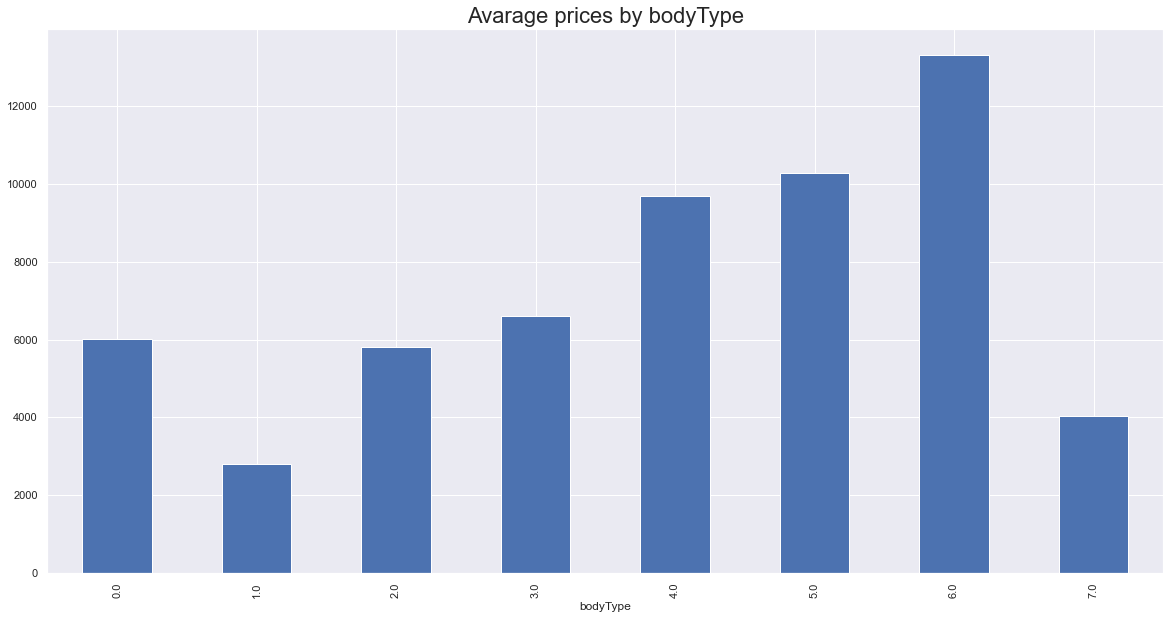

In [209]:
plt.figure(figsize=(20, 10))
train.groupby(['bodyType'])['price'].mean().plot(kind='bar')
plt.title('Avarage prices by bodyType', fontsize=22)

Text(0.5, 1.0, 'Avarage prices by fuelType')

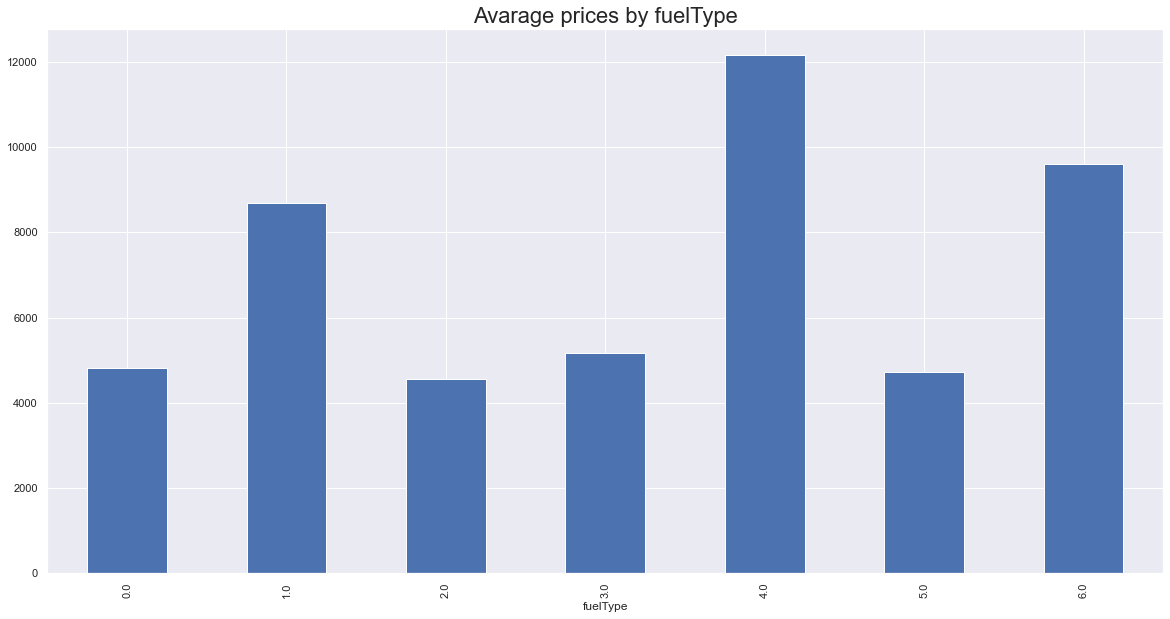

In [210]:
plt.figure(figsize=(20, 10))
train.groupby(['fuelType'])['price'].mean().plot(kind='bar')
plt.title('Avarage prices by fuelType', fontsize=22)

Text(0.5, 1.0, 'Avarage prices by gearbox')

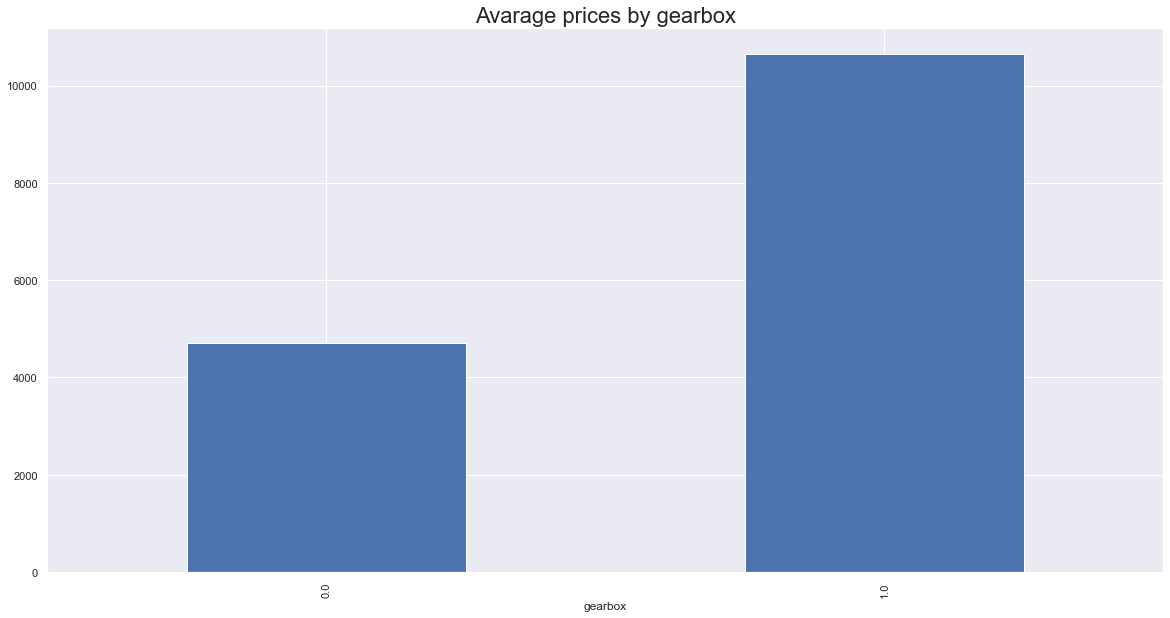

In [211]:
plt.figure(figsize=(20, 10))
train.groupby(['gearbox'])['price'].mean().plot(kind='bar')
plt.title('Avarage prices by gearbox', fontsize=22)

## 3. Data cleaning

### 3.1 Drop seller and offerType

In [212]:
train['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [213]:
train['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [214]:
test['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [215]:
test['offerType'].value_counts()

0    50000
Name: offerType, dtype: int64

In [216]:
train.drop(['seller', 'offerType'], axis=1, inplace=True)
test.drop(['seller', 'offerType'], axis=1, inplace=True)

### 3.2 notRepairedDamage

In [217]:
train['notRepairedDamage'] = train['notRepairedDamage'].replace('-', str(2.0)).astype(float)
test['notRepairedDamage'] = test['notRepairedDamage'].replace('-', str(2.0)).astype(float)

### 3.4 v features

<AxesSubplot:>

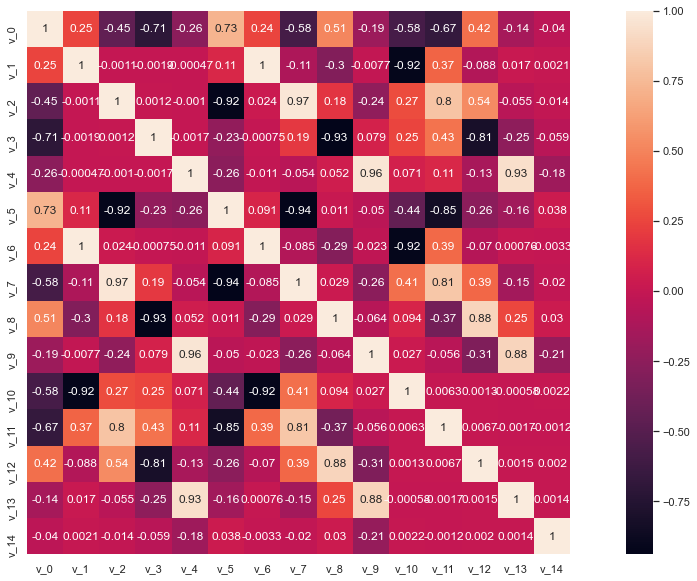

In [218]:
v_features = ['v'+'_'+str(i) for i in range(15)]
corr = train[v_features].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, square=True)

remove: v12, v8, v2, v6, v13, v9

## 4. Feature engineering

### 4.1 Missing velues

In [219]:
# bodyType
tmp = train.groupby(['brand', 'model'])[['bodyType']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'bodyType': 'bodyType_map'})
tmp['bodyType_map'] = tmp['bodyType_map'].apply(lambda x: random.choice(x) if type(x)!=np.float64 else x)
tmp = pd.merge(train, tmp, on=['brand', 'model'], how='left')[['bodyType', 'bodyType_map']]
train['bodyType'] = tmp.apply(lambda x: x['bodyType_map'] if x['bodyType']!=x['bodyType'] else x['bodyType'], axis=1)

tmp = test.groupby(['brand', 'model'])[['bodyType']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'bodyType': 'bodyType_map'})
tmp['bodyType_map'] = tmp['bodyType_map'].apply(lambda x: random.choice(x) if type(x)!=np.float64 else x)
tmp = pd.merge(test, tmp, on=['brand', 'model'], how='left')[['bodyType', 'bodyType_map']]
test['bodyType'] = tmp.apply(lambda x: x['bodyType_map'] if x['bodyType']!=x['bodyType'] else x['bodyType'], axis=1)


# fuelType
tmp = train.groupby(['brand', 'model', 'bodyType'])[['fuelType']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'fuelType': 'fuelType_map'})
tmp['fuelType_map'] = tmp['fuelType_map'].apply(lambda x: np.NaN if type(x)!=np.float64 else x).dropna()
tmp = pd.merge(train, tmp, on=['brand', 'model', 'bodyType'], how='left')[['fuelType', 'fuelType_map']]
train['fuelType'] = tmp.apply(lambda x: x['fuelType_map'] if x['fuelType']!=x['fuelType'] else x['fuelType'], axis=1)
train['fuelType'] = train['fuelType'].fillna(0.0)

tmp = test.groupby(['brand', 'model', 'bodyType'])[['fuelType']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'fuelType': 'fuelType_map'})
tmp['fuelType_map'] = tmp['fuelType_map'].apply(lambda x: np.NaN if type(x)!=np.float64 else x).dropna()
tmp = pd.merge(test, tmp, on=['brand', 'model', 'bodyType'], how='left')[['fuelType', 'fuelType_map']]
test['fuelType'] = tmp.apply(lambda x: x['fuelType_map'] if x['fuelType']!=x['fuelType'] else x['fuelType'], axis=1)
test['fuelType'] = test['fuelType'].fillna(0.0)

# gearbox
tmp = train.groupby(['brand', 'model', 'bodyType', 'fuelType'])[['gearbox']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'gearbox': 'gearbox_map'})
tmp['gearbox_map'] = tmp['gearbox_map'].apply(lambda x: np.NaN if type(x)!=np.float64 else x).dropna()
tmp = pd.merge(train, tmp, on=['brand', 'model', 'bodyType', 'fuelType'], how='left')[['gearbox', 'gearbox_map']]
train['gearbox'] = tmp.apply(lambda x: x['gearbox_map'] if x['gearbox']!=x['gearbox'] else x['gearbox'], axis=1)
train['gearbox'] = train['gearbox'].fillna(0.0)

tmp = test.groupby(['brand', 'model', 'bodyType', 'fuelType'])[['gearbox']].agg(pd.Series.mode).reset_index()\
                                                     .rename(columns={'gearbox': 'gearbox_map'})
tmp['gearbox_map'] = tmp['gearbox_map'].apply(lambda x: np.NaN if type(x)!=np.float64 else x).dropna()
tmp = pd.merge(test, tmp, on=['brand', 'model', 'bodyType', 'fuelType'], how='left')[['gearbox', 'gearbox_map']]
test['gearbox'] = tmp.apply(lambda x: x['gearbox_map'] if x['gearbox']!=x['gearbox'] else x['gearbox'], axis=1)
test['gearbox'] = test['gearbox'].fillna(0.0)


train.dropna(inplace=True)
data = pd.concat([train, test])

### 4.2 date features

In [220]:
data['regDate'] = pd.to_datetime(data['regDate'].apply(lambda x: x if str(x)[4:6]!='00' 
                                                       else str(x)[:4]+str('01')+str(x)[6:8]), format='%Y%m%d')
data['creatDate'] = pd.to_datetime(data['creatDate'], format='%Y%m%d')

for fea in ['regDate', 'creatDate']:
    data[fea+'_year'] = data[fea].dt.year
    data[fea+'_month'] = data[fea].dt.month
    data[fea+'_weekday'] = data[fea].dt.weekday
    data[fea+'_weekofyear'] = data[fea].dt.weekofyear
    
data['date_diff'] = (data['creatDate'] - data['regDate']).dt.days

data = data.drop(['regDate', 'creatDate'], axis=1)

### 4.3 remove high linearly correlated v features

In [221]:
data.drop(['v_2', 'v_6', 'v_8', 'v_9', 'v_12', 'v_13'], axis=1, inplace=True)

### 4.4 categorical features

In [222]:
# count aggregation

cate_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox','notRepairedDamage', 'regionCode', 
                 'regDate_year', 'regDate_month', 'regDate_weekday', 'regDate_weekofyear', 
                 'creatDate_year', 'creatDate_month', 'creatDate_weekday', 'creatDate_weekofyear']
for fea in cate_features:
    data[fea+'_count'] = data.groupby(fea)[fea].transform('count')
        
        
train_ = data[data['price']!=-999]
for fea in cate_features:
    for agg in ['max', 'min', 'mean']:
        tmp = pd.DataFrame(train_.groupby(fea)['price'].agg(agg).reset_index()\
                           .rename(columns={'price': fea+'_'+agg+'_price'}))
        data = pd.merge(data, tmp, on=[fea], how='left')

    
for fea1 in ['brand', 'model', 'bodyType', 'fuelType']:
    for fea2 in ['regionCode']:
        if fea1 != fea2:
            data[fea1+'_'+fea2+'_count'] = data.groupby([fea1, fea2])[fea1].transform('count')
            
# categorical feature and price
for fea1 in ['model', 'brand', 'bodyType', 'fuelType', 'gearbox']:
    for fea2 in ['regionCode', 'notRepairedDamage']:
        for agg in ['max', 'min', 'mean']:
            if fea1 != fea2:
                tmp = pd.DataFrame(train.groupby([fea1, fea2])['price'].agg(agg).reset_index()\
                                        .rename(columns={'price': fea1+'_'+fea2+'_'+agg+'_price'}))
                data = pd.merge(data, tmp, on=[fea1, fea2], how='left')

In [223]:
data

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,price,v_0,v_1,v_3,v_4,v_5,v_7,v_10,v_11,v_14,regDate_year,regDate_month,regDate_weekday,regDate_weekofyear,creatDate_year,creatDate_month,creatDate_weekday,creatDate_weekofyear,date_diff,model_count,brand_count,bodyType_count,fuelType_count,gearbox_count,notRepairedDamage_count,regionCode_count,regDate_year_count,regDate_month_count,regDate_weekday_count,regDate_weekofyear_count,creatDate_year_count,creatDate_month_count,creatDate_weekday_count,creatDate_weekofyear_count,model_max_price,model_min_price,model_mean_price,brand_max_price,brand_min_price,brand_mean_price,bodyType_max_price,bodyType_min_price,bodyType_mean_price,fuelType_max_price,fuelType_min_price,fuelType_mean_price,gearbox_max_price,gearbox_min_price,gearbox_mean_price,notRepairedDamage_max_price,notRepairedDamage_min_price,notRepairedDamage_mean_price,regionCode_max_price,regionCode_min_price,regionCode_mean_price,regDate_year_max_price,regDate_year_min_price,regDate_year_mean_price,regDate_month_max_price,regDate_month_min_price,regDate_month_mean_price,regDate_weekday_max_price,regDate_weekday_min_price,regDate_weekday_mean_price,regDate_weekofyear_max_price,regDate_weekofyear_min_price,regDate_weekofyear_mean_price,creatDate_year_max_price,creatDate_year_min_price,creatDate_year_mean_price,creatDate_month_max_price,creatDate_month_min_price,creatDate_month_mean_price,creatDate_weekday_max_price,creatDate_weekday_min_price,creatDate_weekday_mean_price,creatDate_weekofyear_max_price,creatDate_weekofyear_min_price,creatDate_weekofyear_mean_price,brand_regionCode_count,model_regionCode_count,bodyType_regionCode_count,fuelType_regionCode_count,model_regionCode_max_price,model_regionCode_min_price,model_regionCode_mean_price,model_notRepairedDamage_max_price,model_notRepairedDamage_min_price,model_notRepairedDamage_mean_price,brand_regionCode_max_price,brand_regionCode_min_price,brand_regionCode_mean_price,brand_notRepairedDamage_max_price,brand_notRepairedDamage_min_price,brand_notRepairedDamage_mean_price,bodyType_regionCode_max_price,bodyType_regionCode_min_price,bodyType_regionCode_mean_price,bodyType_notRepairedDamage_max_price,bodyType_notRepairedDamage_min_price,bodyType_notRepairedDamage_mean_price,fuelType_regionCode_max_price,fuelType_regionCode_min_price,fuelType_regionCode_mean_price,fuelType_notRepairedDamage_max_price,fuelType_notRepairedDamage_min_price,fuelType_notRepairedDamage_mean_price,gearbox_regionCode_max_price,gearbox_regionCode_min_price,gearbox_regionCode_mean_price,gearbox_notRepairedDamage_max_price,gearbox_notRepairedDamage_min_price,gearbox_notRepairedDamage_mean_price
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,1850,43.357796,3.966344,2.159744,1.143786,0.235676,0.129549,-2.881803,2.804097,0.914762,2004,4,4,14,2016,4,0,14,4385,3135,13717,49274,131425,155443,148584,40,11911,17077,28284,9085,199978,32493,35596,10782,18600,30,2752.495730,59900,13,3611.840266,99999,12,2740.840583,99999,11,4652.336806,99999,12,4622.751397,99999,13,6979.409070,51800.0,599.0,8669.441176,99999,50,4572.485881,92900,38,6423.560088,95000,11,6035.438048,92900,38,6417.641244,99999.0,11.0,5922.907268,95000,11,6168.936042,99999,11,5943.985657,93900,11,6245.673149,3,1,5,26,1850.0,1850.0,1850.0,18600.0,80.0,3358.650249,5880.0,1450.0,3060.000,59900,14,4472.693643,4800.0,1450.0,2469.250000,45000,13,3327.522816,40999.0,599.0,6602.000000,99990,13,5617.677550,15900.0,599.0,4763.125000,99999,13,5476.348664
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,2.0,4366,3600,45.305273,5.236112,1.380657,-1.422165,0.264777,0.135731,-4.900482,2.096338,0.245522,2003,3,5,9,2016,3,2,10,4757,6026,18421,40903,131425,155443,32393,9,12060,19968,28752,6224,199978,167195,26943,44208,46900,15,6818.198578,99900,15,9273.311947,69900,13,5766.638320,99999,11,4652.336806,99999,12,4622.751397,99999,11,3227.800937,12000.0,1500.0,6474.750000,62900,35,3617.028701,87991,50,5975.459830,99999,15,5917.370358,87991,50,5961.28

### 4.5 numerical features

In [224]:
# cut to bins
data['power'] = pd.cut(data['power'], bins=np.arange(0, 650, 50), labels=False).fillna(0.0)

for fea in [x for x in data.columns if 'v_' in x] + ['kilometer']:
    try:
        data[fea] = pd.qcut(data[fea], q=np.arange(0, 1.1, 0.1), labels=False)
    except:
        data[fea] = pd.qcut(data[fea], q=np.arange(0, 1.1, 0.1), labels=False, duplicates='drop')
        
data = data.dropna(axis=1)

In [225]:
data.isnull().sum().sort_values(ascending=False)

SaleID                                  0
regDate_year_max_price                  0
regDate_weekofyear_min_price            0
regDate_weekofyear_max_price            0
regDate_weekday_mean_price              0
                                       ..
model_count                             0
date_diff                               0
creatDate_weekofyear                    0
creatDate_weekday                       0
gearbox_notRepairedDamage_mean_price    0
Length: 100, dtype: int64

In [226]:
data.shape

(199999, 100)

In [227]:
data.head()

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,price,v_0,v_1,v_3,v_4,v_5,v_7,v_10,v_11,v_14,regDate_year,regDate_month,regDate_weekday,regDate_weekofyear,creatDate_year,creatDate_month,creatDate_weekday,creatDate_weekofyear,date_diff,model_count,brand_count,bodyType_count,fuelType_count,gearbox_count,notRepairedDamage_count,regionCode_count,regDate_year_count,regDate_month_count,regDate_weekday_count,regDate_weekofyear_count,creatDate_year_count,creatDate_month_count,creatDate_weekday_count,creatDate_weekofyear_count,model_max_price,model_min_price,model_mean_price,brand_max_price,brand_min_price,brand_mean_price,bodyType_max_price,bodyType_min_price,bodyType_mean_price,fuelType_max_price,fuelType_min_price,fuelType_mean_price,gearbox_max_price,gearbox_min_price,gearbox_mean_price,notRepairedDamage_max_price,notRepairedDamage_min_price,notRepairedDamage_mean_price,regDate_year_max_price,regDate_year_min_price,regDate_year_mean_price,regDate_month_max_price,regDate_month_min_price,regDate_month_mean_price,regDate_weekday_max_price,regDate_weekday_min_price,regDate_weekday_mean_price,regDate_weekofyear_max_price,regDate_weekofyear_min_price,regDate_weekofyear_mean_price,creatDate_month_max_price,creatDate_month_min_price,creatDate_month_mean_price,creatDate_weekday_max_price,creatDate_weekday_min_price,creatDate_weekday_mean_price,creatDate_weekofyear_max_price,creatDate_weekofyear_min_price,creatDate_weekofyear_mean_price,brand_regionCode_count,model_regionCode_count,bodyType_regionCode_count,fuelType_regionCode_count,brand_notRepairedDamage_max_price,brand_notRepairedDamage_min_price,brand_notRepairedDamage_mean_price,bodyType_notRepairedDamage_max_price,bodyType_notRepairedDamage_min_price,bodyType_notRepairedDamage_mean_price,fuelType_notRepairedDamage_max_price,fuelType_notRepairedDamage_min_price,fuelType_notRepairedDamage_mean_price,gearbox_notRepairedDamage_max_price,gearbox_notRepairedDamage_min_price,gearbox_notRepairedDamage_mean_price
0,0,736,30.0,6,1.0,0.0,0.0,1.0,2,0.0,1046,1850,2,7,8,8,1,7,3,9,8,2004,4,4,14,2016,4,0,14,4385,3135,13717,49274,131425,155443,148584,40,11911,17077,28284,9085,199978,32493,35596,10782,18600,30,2752.495730,59900,13,3611.840266,99999,12,2740.840583,99999,11,4652.336806,99999,12,4622.751397,99999,13,6979.409070,99999,50,4572.485881,92900,38,6423.560088,95000,11,6035.438048,92900,38,6417.641244,95000,11,6168.936042,99999,11,5943.985657,93900,11,6245.673149,3,1,5,26,59900,14,4472.693643,45000,13,3327.522816,99990,13,5617.677550,99999,13,5476.348664
1,1,2262,40.0,1,2.0,0.0,0.0,0.0,3,2.0,4366,3600,6,9,7,1,7,8,1,8,5,2003,3,5,9,2016,3,2,10,4757,6026,18421,40903,131425,155443,32393,9,12060,19968,28752,6224,199978,167195,26943,44208,46900,15,6818.198578,99900,15,9273.311947,69900,13,5766.638320,99999,11,4652.336806,99999,12,4622.751397,99999,11,3227.800937,62900,35,3617.028701,87991,50,5975.459830,99999,15,5917.370358,87991,50,5961.284755,99999,11,5871.357202,99999,15,5863.981947,99999,12,5757.430080,2,2,2,5,80000,15,4893.798399,64990,13,3292.144810,99999,11,2441.644558,99999,12,2625.835207
2,2,14874,115.0,15,1.0,0.0,0.0,3.0,2,0.0,2806,6222,7,9,3,2,3,9,1,8,3,2004,4,5,14,2016,4,5,13,4382,1242,1934,49274,131425,155443,148584,22,11911,17077,28752,9085,199978,32493,32180,48648,45000,100,10908.763754,45000,100,9858.582990,99999,12,2740.840583,99999,11,4652.336806,99999,12,4622.751397,99999,13,6979.409070,99999,50,4572.485881,92900,38,6423.560088,99999,15,5917.370358,92900,38,6417.641244,95000,11,6168.936042,92000,11,5956.623358,99999,13,6052.721047,2,2,4,11,45000,222,10339.364632,45000,13,3327.522816,99990,13,5617.677550,99999,13,5476.348664
3,3,71865,109.0,10,0.0,0.0,1.0,3.0,3,0.0,434,2400,6,8,6,0,9,7,1,7,2,1996,9,6,36,2016,3,5,10,7125,508,18962,57390,131425,44556,148584,50,6435,14042,28839,7882,199978,167195,32180,44208,89000,58,12733.515544,98000,15,8470.804197,99999,12,5907.511186,99999,11,4652.336806,99999,11,10475.857756,99999,13,6979.409070,87900,1

## 5. Train model

In [228]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import KFold

In [234]:
x_train = data[data['price']!=-999].drop(['SaleID', 'price'], axis=1)
y_train = data[data['price']!=-999]['price']
x_test = data[data['price']==-999].drop(['SaleID', 'price'], axis=1)

oof = np.zeros(len(x_train))
sub = pd.DataFrame()
sub['SaleID'] = data[data['price']==-999]['SaleID']
sub['price'] = 0

In [235]:
lgb_model = lgb.LGBMRegressor(max_depth=20, n_estimators=1000, learning_rate=0.1, boosting_type='gbdt', 
                              num_leaves=30)
lgb_model.fit(x_train, y_train)

LGBMRegressor(max_depth=20, n_estimators=1000, num_leaves=30)

In [236]:
mean_absolute_error(lgb_model.predict(x_train), y_train)

587.8806104619474

In [237]:
fold = KFold(n_splits=10)

for i, (trn_idx, val_idx) in enumerate(fold.split(x_train, y_train)):
    train_x = x_train.iloc[trn_idx, :]
    val_x = x_train.iloc[val_idx, :]
    train_y = y_train.iloc[trn_idx]
    val_y = y_train.iloc[val_idx]
    
    lgb_model.fit(train_x, train_y, eval_set=[(val_x, val_y)],
                  eval_metric='mae', early_stopping_rounds=100, verbose=100,
                  categorical_feature=cate_features)
    oof[val_idx] = lgb_model.predict(val_x)
    sub['price'] = lgb_model.predict(x_test)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 905.723	valid_0's l2: 3.47757e+06
[200]	valid_0's l1: 882.426	valid_0's l2: 3.3312e+06
[300]	valid_0's l1: 867.091	valid_0's l2: 3.26213e+06
[400]	valid_0's l1: 860.967	valid_0's l2: 3.23243e+06
[500]	valid_0's l1: 855.382	valid_0's l2: 3.20389e+06
[600]	valid_0's l1: 853.896	valid_0's l2: 3.20295e+06
Early stopping, best iteration is:
[524]	valid_0's l1: 854.826	valid_0's l2: 3.20173e+06
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 908.532	valid_0's l2: 3.3895e+06
[200]	valid_0's l1: 879.784	valid_0's l2: 3.19025e+06
[300]	valid_0's l1: 863.6	valid_0's l2: 3.10698e+06
[400]	valid_0's l1: 854.525	valid_0's l2: 3.05984e+06
[500]	valid_0's l1: 848.738	valid_0's l2: 3.03627e+06
[600]	valid_0's l1: 843.877	valid_0's l2: 3.01972e+06
[700]	valid_0's l1: 840.157	valid_0's l2: 3.01054e+06
[800]	valid_0's l1: 838.32	valid_0's l2: 3.01023e+06
[900]	valid_0's l1: 836.106	valid_0'

In [233]:
feature_imp = pd.DataFrame(lgb_model.feature_importances_).rename(columns={0: 'score'})
feature_imp['name'] = x_train.columns
feature = feature_imp[['name', 'score']].sort_values('score', ascending=False)
feas = feature[feature.score>50]['name']
feas

ValueError: Length of values (68) does not match length of index (98)

In [243]:
from sklearn.model_selection import train_test_split


train = data[data['price']!=-999].drop(['SaleID', 'price'], axis=1)
target = data[data['price']!=-999]['price']
test = data[data['price']==-999].drop(['SaleID', 'price'], axis=1)


x_train, x_val, y_train, y_val = train_test_split(train, target, random_state=2021, test_size=0.2)


def LGB_bayesian(num_leaves, bagging_fraction,feature_fraction, min_child_weight, 
    min_data_in_leaf, max_depth,reg_alpha,reg_lambda, n_estimators, learning_rate):
    
    param = { 'num_leaves': int(num_leaves), 
              'min_data_in_leaf': int(min_data_in_leaf),
              'min_child_weight': min_child_weight,
              'bagging_fraction' : bagging_fraction,
              'feature_fraction' : feature_fraction,
              'max_depth': int(max_depth),
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'objective': 'regression',
              'n_estimators': int(n_estimators),
              'learning_rate': learning_rate,
#               'save_binary': True,
              'data_random_seed': 1337,
              'boosting_type': 'gbdt',
              'verbose': 1,
#               'is_unbalance': False,
#               'boost_from_average': True,
              'metric':'mae'}    
    
    trn_data= lgb.Dataset(x_train, label=y_train)
    val_data= lgb.Dataset(x_val, label=y_val)

    lgbm=lgb.train(param, trn_data,num_boost_round=1000, 
                   valid_sets = [trn_data, val_data], verbose_eval=50, early_stopping_rounds = 200)
    
    pred_val  = lgbm.predict(x_val, num_iteration=lgbm.best_iteration) 
    score = mean_absolute_error(y_val, pred_val)
    return score

bounds_LGB = {
    'num_leaves': (20, 500), 
    'min_data_in_leaf': (20, 200),
    'bagging_fraction' : (0.1, 0.9),
    'feature_fraction' : (0.1, 0.9),
    'min_child_weight': (0.00001, 0.01),   
    'reg_alpha': (1, 2), 
    'reg_lambda': (1, 2),
    'max_depth':(-1,50),
    'n_estimators': (200, 2000),
    'learning_rate': (0.01, 0.2)}
lgb_op =BayesianOptimization(LGB_bayesian,bounds_LGB)
lgb_op.maximize(init_points=10, n_iter=10, acq='ucb', xi=0.0, alpha=1e-6)
print(lgb_op.max)

|   iter    |  target   | baggin... | featur... | learni... | max_depth | min_ch... | min_da... | n_esti... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3540
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 94
[LightGBM] [Info] Start training from score 5925.640164
Training until validation scores don't improve for 200 rounds
[50]	training's l1: 647.875	valid_1's l1: 805.78
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's l1: 533.947	valid_1's l1: 796.223
[LightGBM] [Warning] No further splits with positive gain,

Early stopping, best iteration is:
[76]	training's l1: 567.685	valid_1's l1: 802.308
|  5        |  802.3    |  0.2441   |  0.67     |  0.1859   |  37.39    |  0.008252 |  97.02    |  1.483e+0 |  408.2    |  1.181    |  1.031    |
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3534
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 93
[LightGBM] [Info] Start training from score 5925.640164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

|  6        |  840.5    |  0.2224   |  0.5195   |  0.07296  |  8.695    |  0.002019 |  198.5    |  260.5    |  463.5    |  1.468    |  1.132    |
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3540
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 94
[LightGBM] [Info] Start training from score 5925.640164
Training until validation scores don't improve for 200 rounds
[50]	training's l1: 827.173	valid_1's l1: 877.098
[100]	training's l1: 763.239	valid_1's l1: 848.139
[150]	training's l1: 717.507	valid_1's l1: 836.959
[200]	training's l1: 681.865	valid_1's l1: 830.145
[250]	training's l1: 648.997	valid_1's l1: 823.768
[300]	training's l1: 623.36	valid_1's l1: 822.348
[350]	training's l1: 598.634	valid_1's l1: 820.964
[400]	training's l1: 576

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	training's l1: 875.736	valid_1's l1: 903.971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	training's l1: 739.352	valid_1's l1: 816.293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[89]	training's l1: 637.591	valid_1's l1: 815.724
|  10       |  815.7    |  0.3437   |  0.6096   |  0.1966   |  22.62    |  0.007841 |  129.8    |  503.8    |  242.1    |  1.975    |  1.023    |
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3540
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 94
[LightGBM] [Info] Start training from score 5925.640164
Training until validation scores don't improve for 200 r

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	training's l1: 983.742	valid_1's l1: 998.308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	training's l1: 901.641	valid_1's l1: 923.711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1550]	training's l1: 862.444	valid_1's l1: 892.511
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1600]	training's l1: 859.254	valid_1's l1: 889.843
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[550]	training's l1: 690.536	valid_1's l1: 812.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[682]	training's l1: 665.027	valid_1's l1: 811.115
|  15       |  811.1    |  0.6127   |  0.7681   |  0.1521   |  7.524    |  0.004592 |  167.8    |  682.1    |  358.7    |  1.207    |  1.162    |
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3540
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 94
[LightGBM] [Info] Start training from score 5925.640164
Training until validation scores don't improve for 200 rounds
[50]	training's l1: 748.452	valid_1's l1: 828.088
[100]	training's l1: 665.157	valid_1's l1: 808.53
[150]	training's l1: 607.242	valid_1's l1: 802.333
[200]	training's l1: 561.381	valid_1's l1: 800.182
[25

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	training's l1: 512.258	valid_1's l1: 845.564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	training's l1: 596.162	valid_1's l1: 809.626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	training's l1: 566.507	valid_1's l1: 809.716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	training's l1: 539.733	valid_1's l1: 810.389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	training's l1: 516.102	valid_1's l1: 811.476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	training's l1: 494.062	valid_1's l1: 811.877
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	training's l1: 662.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [182]:
from bayes_opt import BayesianOptimization

In [244]:
lgb_model = lgb.LGBMRegressor(max_depth=16, n_estimators=960, learning_rate=0.07, boosting_type='gbdt', 
                              num_leaves=32, bagging_fraction=0.35, feature_fraction=0.11, min_child_weight=0.0099,
                              min_data_in_leaf=155, reg_alpha=1.13, reg_lambda=1.09)
lgb_model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=155, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=155
[LightGBM] [Warning] bagging_fraction is set=0.35, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35
[LightGBM] [Warning] feature_fraction is set=0.11, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11


LGBMRegressor(bagging_fraction=0.35, feature_fraction=0.11, learning_rate=0.07,
              max_depth=16, min_child_weight=0.0099, min_data_in_leaf=155,
              n_estimators=960, num_leaves=32, reg_alpha=1.13, reg_lambda=1.09)

In [245]:
mean_absolute_error(y_train, lgb_model.predict(x_train))

825.2219075631454